# Credit Risk Prediction Model

By DIMAS ANGGA WIJAYA MUKTI

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import precision_score,recall_score, f1_score

# Business Understanding

Sebagai tugas akhir dari masa kontrak saya sebagai intern Data Scientist di ID/X Partners, kali ini saya akan dilibatkan dalam projek dari sebuah lending company. Saya akan berkolaborasi dengan berbagai departemen lain dalam projek ini untuk menyediakan solusi teknologi bagi company tersebut. Saya diminta untuk membangun model yang dapat memprediksi credit risk menggunakan dataset yang disediakan oleh company yang terdiri dari data pinjaman yang diterima dan yang ditolak. Selain itu saya juga perlu mempersiapkan media visual untuk mempresentasikan solusi ke klien.

# Analytical Approach

setelah mengetahui tentang permasalahan yang diperoleh dari resiko kredit, maka akan dilakukan analisis dan modeling sebagai berikut:

1. Logistic Regression
2. Random Forest
3. K-Nearest Neightbor
4. Support Vector Machines
5. Neural Network

# Data Requirements

Data yang digunakan sudah disediakan oleh perusahaan terkait. oleh karena itu, data yang digunakan cukup itu saja

# Data Collection

Data diperoleh dengan mendownload melalui website perusahaan terkait

# Data Understanding

In [2]:
#Membaca dataframe yang akan digunakan
df_loan = pd.read_csv('Downloads\loan_data_2007_2014.csv')

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Melihat 5 baris pertama pada dataframe
pd.options.display.max_columns = None
df_loan.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Menngetahui informasi tentang dataframe
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Data df_loan memiliki jumlah kolom sebanyak 75 dan jumlah data sebanyak 466285. Data memiliki kolom yang cukup banyak, sehingga perlu dilihat lagi terkait kelengkapan data setiap kolom

In [5]:
pd.options.display.max_rows = None
df_loan.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

Hasil pengecekan jumlah data null dalam setiap kolom, dapat dilihat bahwa masih terdapat nilai null yang cukup banyak. Ada juga yang seluruh data berisi nilai null. Perlu dilihat lagi lebih jauh tentang data terkait

# Eksploratory Data Analysis

## Loan Distribution

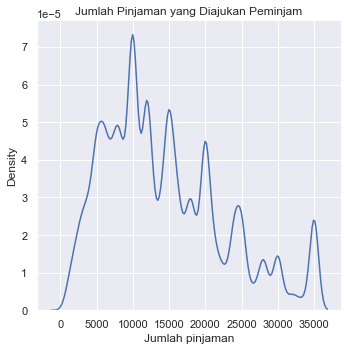

In [6]:
#Membuat histogram dari jumlah yang diajukan peminjam
s = sns.displot(data=df_loan, x="loan_amnt",kind="kde")
s.set(title='Jumlah Pinjaman yang Diajukan Peminjam')
s.set_axis_labels("Jumlah pinjaman","Density")

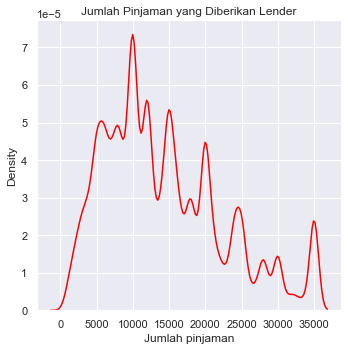

In [7]:
#Membuat histogram dari jumlah yang diberikan lender
s = sns.displot(data=df_loan, x="funded_amnt",kind="kde",color='red')
s.set(title='Jumlah Pinjaman yang Diberikan Lender')
s.set_axis_labels("Jumlah pinjaman","Density")

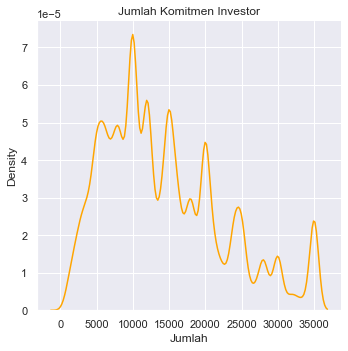

In [8]:
#Membuat histogram dari jumlah komitmen investor
s = sns.displot(data=df_loan, x="funded_amnt",kind="kde",color='orange')
s.set(title='Jumlah Komitmen Investor')
s.set_axis_labels("Jumlah","Density")

Terlihat bahwa ketiga variabel memiliki grafik distribusi yang mirip, sehingga dapat kita simpulkan bahwa semua pengajuan sesuai dengan yang diberikan oleh lender

## Interest Rate

In [10]:
def datetime_imputer(df,col):
    df[col] = pd.to_datetime(df[col], format = "%b-%y")

datetime_imputer(df_loan,'issue_d')

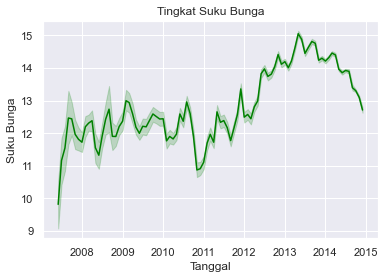

In [11]:
#Membuat plot dari interest rate
s = sns.lineplot(data=df_loan, x="issue_d", y="int_rate",color='green')
s.set(xlabel="Tanggal",ylabel="Suku Bunga",title='Tingkat Suku Bunga')
plt.show()

Terlihat bahwa suku bunga yang ditetapkan oleh lender cenderung memiliki tren naik dan fluktuatif. Dari 2013 sampai 2014 akhir menunjukkan penurunan

## Tujuan Pinjaman

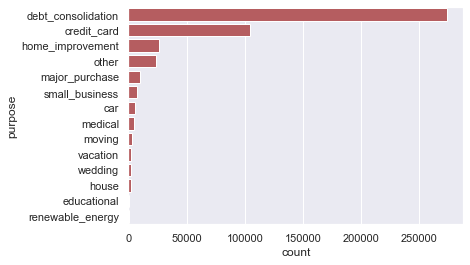

In [12]:
a = df_loan.groupby('purpose')['id'].count().sort_values(ascending = False).reset_index()
a.rename(columns = {'id' : 'count'}, inplace = True)
s = sns.barplot(data=a,x="count",y="purpose",color="r")

Informasi dari plot di atas adalah tujuan peminjam terbanyak adalah untuk membayar hutang. Terbanyak kedua adalah untuk membayar kartu kredit

## Pinjaman Bermasalah

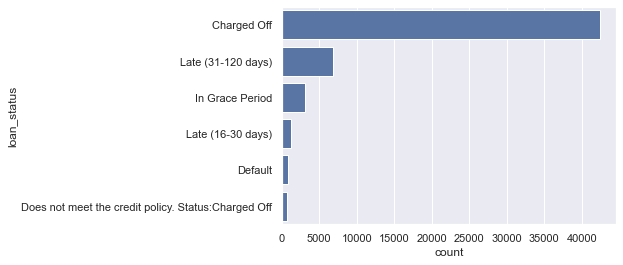

In [13]:
problem = ['Charged Off','Default','Late (31-120 days)','In Grace Period','Late (16-30 days)','Does not meet the credit policy. Status:Charged Off']
problem_col = df_loan[df_loan['loan_status'].isin(problem)]
b = problem_col.groupby('loan_status')['id'].count().sort_values(ascending = False).reset_index()
b.rename(columns = {'id' : 'count'}, inplace = True)
s = sns.barplot(data=b,x="count",y="loan_status",color="b")

Terlihat bahwa peminjam bermasalah terbanyak adalah charged off. Yaitu peminjam yang sudah dipastikan bermasalah oleh lender dalam proses pembayarannya

## Loan Grades

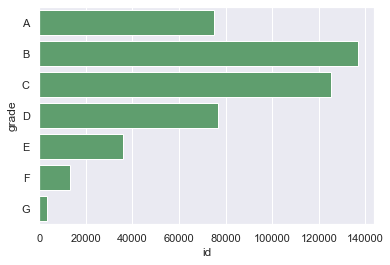

In [14]:
count_grades = df_loan.groupby('grade')['id'].count().reset_index()
s = sns.barplot(data=count_grades,x="id",y="grade",color="g")

Peminjam banyak yang berada di kelas B dan C

# Data Preparation

## Missing Value handling

In [15]:
#Menghapus kolom yang bernilai null semua
df_loan.dropna(how='all',axis=1,inplace=True)

In [16]:
pd.options.display.max_rows = 100
df_loan.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

## Redundan Kolom

Pada df_loan terdapat kolom yang redundan dan tidak perlu dimasukkan untuk pemodelan, yaitu:

1. id        : sudah terwakilkan dengan index
2. member_id : sudah terwakilkan dengan index
3. sub_grade : sudah terwakilkan dengan grade
4. pymnt_plan
5. url
6. title
7. zip_code
8. addr_state
9. emp_title
10. desc
11. application_type
12. policy_code

In [17]:
df_loan.drop(['Unnamed: 0','id','member_id','sub_grade','application_type','policy_code','emp_title','desc','pymnt_plan','url','title','zip_code','addr_state'],axis=1,inplace=True)
df_loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60 months,14.47,432.64,C,4 years,MORTGAGE,110000.0,Source Verified,2014-01-01,Current,debt_consolidation,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,0.0,0.0,294998.0,29900.0
466281,22000,22000,22000.0,60 months,19.97,582.50,D,10+ years,MORTGAGE,78000.0,Verified,2014-01-01,Charged Off,debt_consolidation,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,Dec-14,17.50,NaN,Jan-16,0.0,NaN,0.0,0.0,221830.0,39400.0
466282,20700,20700,20700.0,60 months,16.99,514.34,D,7 years,MORTGAGE,46000.0,Verified,2014-01-01,Current,debt_consolidation,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,0.0,0.0,73598.0,13100.0
466283,2000,2000,2000.0,36 months,7.90,62.59,A,3 years,OWN,83000.0,Verified,2014-01-01,Fully Paid,credit_card,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,0.0,0.0,591610.0,53100.0


In [18]:
df_loan['total_acc'].unique()

array([  9.,   4.,  10.,  37.,  38.,  12.,  11.,  13.,   3.,  23.,  34.,
        29.,  28.,  42.,  14.,  22.,  21.,  17.,   7.,  31.,  44.,  26.,
        16.,   6.,  18.,  27.,  24.,  25.,  40.,  35.,   8.,  20.,  15.,
        19.,  36.,  51.,  32.,  30.,  33.,  46.,   5.,  61.,  56.,  50.,
        41.,  39.,  79.,  62.,  43.,  47.,  53.,  45.,  60.,  55.,  52.,
        58.,  54.,  57.,  49.,  63.,  48.,  59.,  77.,  87.,  75.,  72.,
        64.,  67.,  78.,  76.,  74.,  66.,  81.,  90.,  80.,  71.,  69.,
        73.,  70.,  68.,  65.,   2.,   1.,  nan, 105.,  83.,  84.,  98.,
        88.,  82.,  91.,  99.,  86.,  93.,  92.,  96., 101., 150.,  95.,
        85., 156.,  89., 106.,  97., 119., 124., 100.,  94., 121., 102.,
       117., 116., 118.])

## Imputasi Missing Value

In [19]:
df_loan.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
purpose                             0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc                          29
initial_list_status                 0
out_prncp   

In [20]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  int64         
 1   funded_amnt                  466285 non-null  int64         
 2   funded_amnt_inv              466285 non-null  float64       
 3   term                         466285 non-null  object        
 4   int_rate                     466285 non-null  float64       
 5   installment                  466285 non-null  float64       
 6   grade                        466285 non-null  object        
 7   emp_length                   445277 non-null  object        
 8   home_ownership               466285 non-null  object        
 9   annual_inc                   466281 non-null  float64       
 10  verification_status          466285 non-null  object        
 11  issue_d                   

### emp_length

In [21]:
df_loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [22]:
#Mengubah tipe data emp_length menjadi integer dan mengisi null dengan rata-rata
def emp_length_num_fill(df,col):
    df[col] = df[col].str.replace('\+ years','')
    df[col] = df[col].str.replace('< 1 year','0')
    df[col] = df[col].str.replace(' years','')
    df[col] = df[col].str.replace(' year','')
    df[col] = pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(),inplace=True)
    
emp_length_num_fill(df_loan,'emp_length')

In [23]:
df_loan['emp_length'].isnull().sum()

0

### issue_d, earliest_cr_line,last_pymnt_d, next_pymnt_d, last_credit_pull_d

In [24]:
df_loan['issue_d'].unique()

array(['2011-12-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2009-11-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-09-01

In [25]:
#Mengubah tipe data issue_d
def datetime_convert(df,col):
    date = pd.to_datetime('2022-09-01')
    df_loan[col+'_day_diff'] = (date - df[col])/np.timedelta64(1,'D')
    df_loan[col+'_day_diff'] = df_loan[col+'_day_diff'].apply(lambda x: df_loan[col+'_day_diff'].max() if x < 0 else x)

datetime_convert(df_loan,'issue_d')

In [26]:
df_loan['issue_d_day_diff'].unique()

array([3927., 3957., 3988., 4018., 4049., 4080., 4110., 4141., 4171.,
       4202., 4230., 4261., 4292., 4322., 4353., 4383., 4414., 4445.,
       4475., 4506., 4536., 4567., 4595., 4626., 4657., 4687., 4718.,
       4748., 4779., 4810., 4840., 4871., 4901., 4932., 4960., 4991.,
       5022., 5052., 5083., 5113., 5144., 5175., 5205., 5236., 5266.,
       5297., 5326., 5357., 5388., 5418., 5449., 5479., 5510., 5541.,
       5571., 3196., 3226., 3257., 3287., 3318., 3349., 3379., 3410.,
       3440., 3471., 3499., 3530., 3561., 3591., 3622., 3652., 3683.,
       3714., 3744., 3775., 3805., 3836., 3865., 3896., 2831., 2861.,
       2892., 2922., 2953., 2984., 3014., 3045., 3075., 3106., 3134.,
       3165.])

In [27]:
#Mengisi missing value dengan
def datetime_imputer(df,col):
    df[col] = pd.to_datetime(df[col],format='%b-%y')
    date = pd.to_datetime('2022-09-01')
    df_loan[col+'_day_diff'] = (date - df[col])/np.timedelta64(1,'D')
    df_loan[col+'_day_diff'] = df_loan[col+'_day_diff'].apply(lambda x: df_loan[col+'_day_diff'].max() if x < 0 else x)
    df_loan[col+'_day_diff'].fillna(df_loan[col+'_day_diff'].value_counts().index[0],inplace=True)

datetime_imputer(df_loan,'earliest_cr_line')
datetime_imputer(df_loan,'last_pymnt_d')
datetime_imputer(df_loan,'next_pymnt_d')
datetime_imputer(df_loan,'last_credit_pull_d')

In [28]:
#Menghapus kolom earliest_cr_line dan diganti dengan earliest_cr_line_day_diff
df_loan.drop(['issue_d','earliest_cr_line','last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'],axis=1,inplace=True)

### annual_inc, delinq_2yrs, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_util, total_acc, collections_12_mths_ex_med, mths_since_last_major_derog, acc_now_delinq, tot_coll_amt, tot_cur_bal, total_rev_hi_lim

In [29]:
#Mengisi missing value dengan rata-rata
def num_imputer(df,col):
    df[col].fillna(round(df[col].mean()),inplace=True)

num_imputer(df_loan,'annual_inc')
num_imputer(df_loan,'delinq_2yrs')
num_imputer(df_loan,'inq_last_6mths')
num_imputer(df_loan,'mths_since_last_delinq')
num_imputer(df_loan,'mths_since_last_record')
num_imputer(df_loan,'open_acc')
num_imputer(df_loan,'pub_rec')
num_imputer(df_loan,'revol_util')
num_imputer(df_loan,'total_acc')
num_imputer(df_loan,'collections_12_mths_ex_med')
num_imputer(df_loan,'mths_since_last_major_derog')
num_imputer(df_loan,'tot_coll_amt')
num_imputer(df_loan,'acc_now_delinq')
num_imputer(df_loan,'tot_cur_bal')
num_imputer(df_loan,'total_rev_hi_lim')

In [30]:
df_loan.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
loan_status                    0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_

### Term

In [31]:
#Mengubah tipe data term menjadi integer dan mengisi null dengan rata-rata
def term_imputer(df,col):
    df[col] = df[col].str.replace(' months','')
    df[col] = pd.to_numeric(df[col])
    
term_imputer(df_loan,'term')

In [32]:
df_loan['term']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term, Length: 466285, dtype: int64

Deskripsi

loan_amnt                 : jumlah pinjaman yang diajukan peminjam
funded_amnt               : jumlah dana yang dipinjamkan
term                      : jangka waktu peminjaman
int_rate                  : suku bunga
installment               : angsuran
grade                     : kelas
sub_grade                 : sub-kelas
emp_title                 : jabatan peminjam
emp_length                : lama kerja peminjam
home_ownership            : kepemilikan rumah dari peminjam
annual_inc                : penghasilan tahunan yang disediakan oleh peminjam selama pendaftaran
verrification_status      : status pendapatan diverifikasi oleh LC
issue_d                   : bulan peminjaman didanai
loan_status               : status pinjaman saat ini
pymnt_plan                : rencana pembayaran untuk pinjaman
url                       : url untuk halaman LC
desc                      : deskripsi pinjaman dari peminjam
purpose                   : kategori yang disediakan oleh peminjam untuk permintaan
title                     : judul pinjaman oleh peminjam
zip_code                  : 3 digit pertama kode pos
addr_state                : negara peminjam
dti                       : Rasio yang dihitung menggunakan total pembayaran utang bulanan peminjam dan pendapatan bulanan peminjam 
delinq_2yrs               : Jumlah 30+ hari kejadian tunggakan yang jatuh tempo sebelumnya dalam file kredit peminjam selama 2 tahun terakhir
earliest_cr_line          : Tanggal batas kredit peminjam yang paling awal dilaporkan
inq_last_6mths            : jumlah pertanyaan dalam 6 bulan terakhir
mths_since_last_delinq    : jumlah bulan sejak kenakalan terakhir peminjam
mths_since_last_record    : jumlah bulan sejak catatan publik terakhir
open_acc                  : jumlah jalur kredit terbuka dalam file kredit peminjam
pub_rec                   : jumlah catatan publik yang menghina
revol_bal                 : Total saldo bergulir kredit
revol_util                : Tingkat pemanfaatan jalur bergulir
total_acc                 : jumlah total jalur kredit saat ini
initial_list_status       : status daftar awal peminjam
out_prncp                 : Sisa pokok terutang untuk jumlah total yang didanai
out_prncp_inv             : Sisa pokok yang beredar untuk porsi jumlah total yang didanai oleh investor
total_pymnt               : pembayaran diterima hingga saat ini untuk total yang didanai
total_pymnt_inv           : pembayaran diterima hingga saat ini untuk sebagian yang didanai
total_rec_prncp           : sisa pokok diterima saat ini
total_rec_int             : bunga yang diterima saat ini
total_rec_late_fee        : biaya keterlambatan yang diterima saat ini
recoveries                : rencana pembayaran untuk pinjaman
collection_recovery_fee   : biaya pasca biaya pengumpulan
last_pymnt_d              : bulan terakhir pembayaran diterima
last_pymnt_amnt           : bulan terakhir pembayaran diterima
next_pymnt_d              : tanggal pembayaran terjadwal berikutnya
collections_12_mths_ex_med: jumlah koleksi dalam 12 bulan 
mths_since_last_major_derog: Bulan sejak peringkat 90 hari atau lebih buruk terbaru
policy_code                : kode keamanan yang tersedia
application_type           : Menunjukkan apakah pinjaman adalah aplikasi individu atau aplikasi bersama dengan dua peminjam bersama
acc_now_delinq             : Jumlah akun di mana peminjam sekarang nakal
tot_coll_amt               : Total jumlah pengumpulan yang pernah ada
tot_cur_bal                : Total Saldo Saat Ini dari Semua Akun
total_rev_hi_lim           : Total revolving batas kredit/kredit yang tinggi

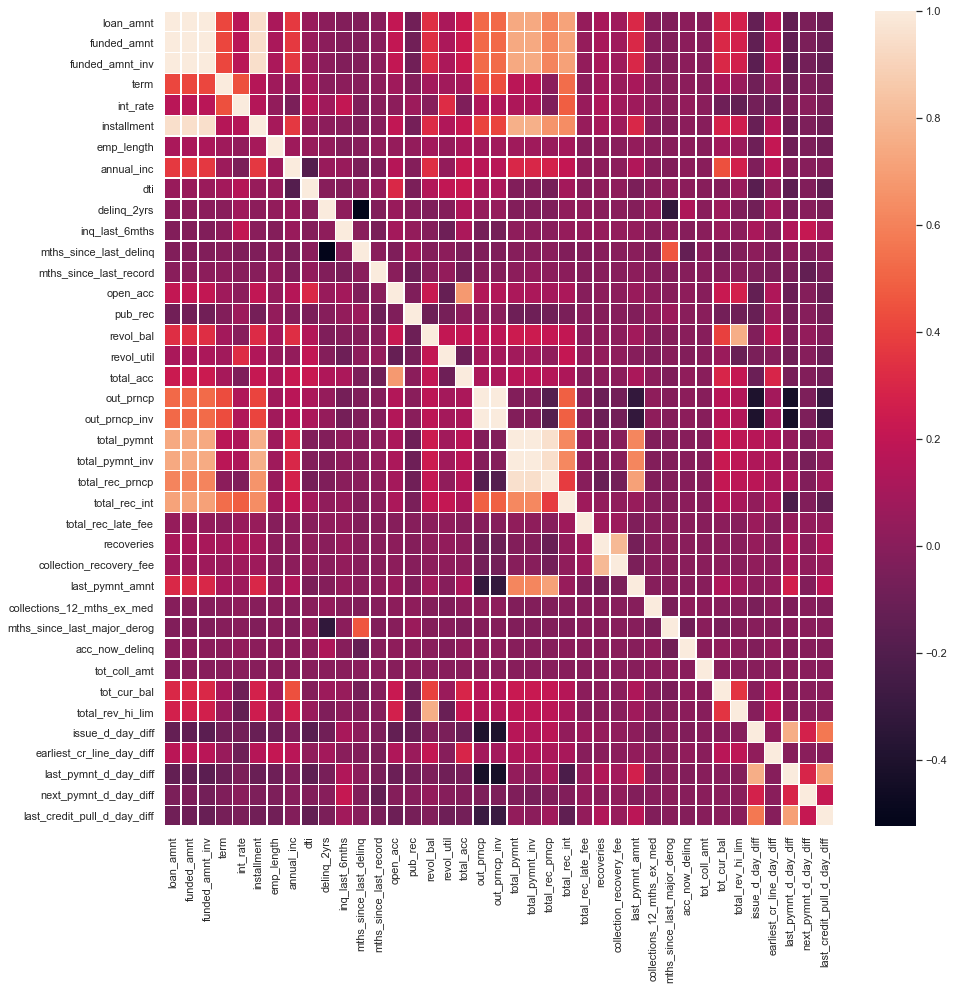

In [39]:
# Analisis Korelasi
f, ax = plt.subplots(figsize=(15, 15))
corr = df_loan.corr()
sns.heatmap(corr, linewidths=.5, ax=ax)
plt.show()

Dari heatmap tersebut dapat dilihat ada beberapa variabel yang akan menyebabkan multikolinearitas, yaitu:

1. funded_amnt_inv
2. out_prncp_inv
3. total_pymnt_inv
4. loan_amnt (sudah diwakili oleh funded_amnt)

In [41]:
#Menghilangkan variabel pemicu multikolinearitas
df_loan.drop(['funded_amnt_inv','out_prncp_inv','total_pymnt_inv','loan_amnt'],axis=1,inplace=True)

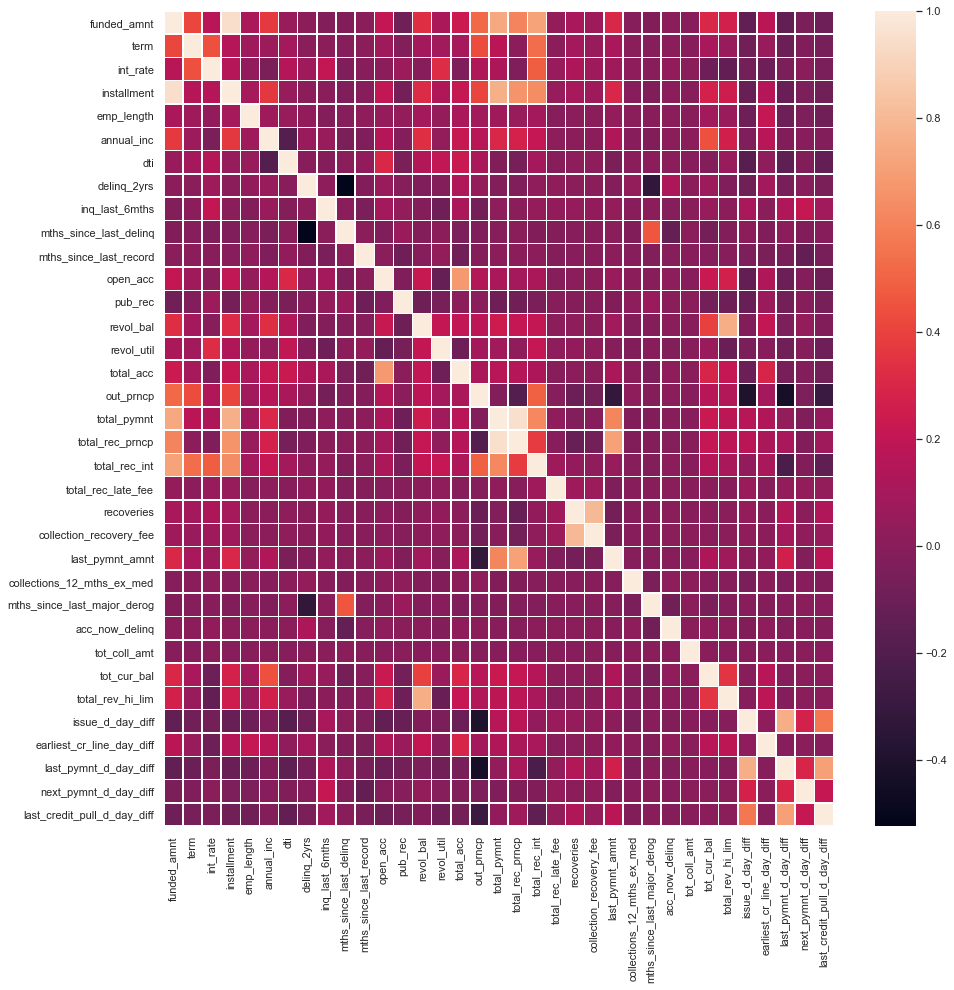

In [42]:
# Analisis Korelasi
f, ax = plt.subplots(figsize=(15, 15))
corr = df_loan.corr()
sns.heatmap(corr, linewidths=.5, ax=ax)
plt.show()

## Mengidentifikasi variabel target (loan_status)

In [43]:
#Melihat nilai unique dan jumlahnya pada loan_status
df_loan['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

### Diketahui peminjaman yang bermasalah:

1. Charged off       : pembayaran diperkirakan tidak lunas
2. Default           : pembayaran default
3. Does not meet the credit policy. Status:Charged Off : pembayaran diperkirakan tidak lunas

Diketahui peminjaman yang tidak bermasalah:
1. Current           : pembayaran tepat waktu
2. Fully Paid        : pembayaran lunas
3. Does not meet the credit policy. Status:Fully Paid : pembayaran lunas

Peminjaman yang masih belum tau masuk kategori mana:
1. Late (16-31 days) : pembayaran telat dilunasi dalam 16-31 hari
2. In Grace Period   : pembayaran dalam masa tenggang
3. Late (31-120 days) : pembayaran telat dilunasi dalam 31-120 hari

oleh karena itu, akan dilihat bagaimana kondisi peminjam yang belum masuk dalam kategori bermasalah atau tidak. akan dilakukan analisis deskriptif

In [44]:
df_loan.isnull().sum()

funded_amnt                    0
term                           0
int_rate                       0
installment                    0
grade                          0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
loan_status                    0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
total_pymnt                    0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
collection

### Late (16-31 days) 

In [45]:
#Akan dicari rasio peminjam yang sudah membayar kurang dari 80% dengan jumlah total peminjam late (16-30 days)
late_16_30 = df_loan.loc[df_loan['loan_status']=='Late (16-30 days)']
percentage = round((len(late_16_30[late_16_30['total_pymnt']<late_16_30['funded_amnt']*0.8])/len(late_16_30))*100,2)
percentage

75.62

Karena jumlah peminjam pada Late (16-31 days) 75.62% total pembayarannya kurang dari 80% pinjaman, maka untuk loan_status Late (16-31 days) masuk dalam Default

### In Grace Period

In [46]:
#Akan dicari rasio peminjam yang sudah membayar kurang dari 80% dengan jumlah total peminjam late (16-30 days)
In_Grace_Period = df_loan.loc[df_loan['loan_status']=='In Grace Period']
percentage = round((len(In_Grace_Period[In_Grace_Period['total_pymnt']<In_Grace_Period['funded_amnt']*0.8])/len(In_Grace_Period))*100,2)
percentage

71.33

Karena jumlah peminjam yang berada pada masa tenggang sebesar 71,33% total pembayaran kurang dari 80% pinjaman, dan ada kemungkinan akan terlambat dan akan default,maka In Grace periode masuk ke dalam default

Disini diperoleh pengelompokan loan_status ke dalam 2 jenis yaitu:
    
1. Default     : Charged off, Late (31-120 days), Default, Does not meet the credit policy. Status:Charged Off, In Grace Period, Late (16-30 days)
2. non-Default : Current, Fully Paid, Does not meet the credit policy. Status:Fully Paid

In [47]:
#Membuat kolom baru dengan nama Default_Non-Default dan beri nilai 1 untuk Non-Default, 0 untuk Default
Deft = np.array(['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'])
df_loan['Default_Non-Default'] = np.where(df_loan['loan_status'].isin(Deft),1,0)
df_loan['Default_Non-Default']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: Default_Non-Default, Length: 466285, dtype: int32

In [48]:
df_loan

,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_d_day_diff,earliest_cr_line_day_diff,last_pymnt_d_day_diff,next_pymnt_d_day_diff,last_credit_pull_d_day_diff,Default_Non-Default
0,5000,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,1.0,34.0,74.0,3.0,0.0,13648,83.7,9.0,f,0.00,5861.071414,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,43.0,0.0,192.0,138802.0,30379.0,3927.0,13757.0,2800.0,2404.0,2435.0,1
1,2500,60,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,5.0,34.0,74.0,3.0,0.0,1687,9.4,4.0,f,0.00,1008.710000,456.46,435.17,0.00,117.08,1.11,119.66,0.0,43.0,0.0,192.0,138802.0,30379.0,3927.0,8554.0,3440.0,2404.0,3287.0,0
2,2400,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0.0,2.0,34.0,74.0,2.0,0.0,2956,98.5,10.0,f,0.00,3003.653644,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,43.0,0.0,192.0,138802.0,30379.0,3927.0,7609.0,3014.0,2404.0,2435.0,1
3,10000,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0.0,1.0,35.0,74.0,10.0,0.0,5598,21.0,37.0,f,0.00,12226.302210,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,43.0,0.0,192.0,138802.0,30379.0,3927.0,9709.0,2800.0,2404.0,2800.0,1
4,3000,60,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,Current,other,17.94,0.0,0.0,38.0,74.0,15.0,0.0,27783,53.9,38.0,f,766.90,3242.170000,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,43.0,0.0,192.0,138802.0,30379.0,3927.0,9740.0,2435.0,2404.0,2435.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,60,14.47,432.64,C,4.0,MORTGAGE,110000.0,Source Verified,Current,debt_consolidation,19.85,0.0,2.0,34.0,74.0,18.0,0.0,23208,77.6,36.0,w,12574.00,10383.360000,5826.00,4557.36,0.00,0.00,0.00,432.64,0.0,43.0,0.0,0.0,294998.0,29900.0,3165.0,7093.0,2435.0,2404.0,2435.0,1
466281,22000,60,19.97,582.50,D,10.0,MORTGAGE,78000.0,Verified,Charged Off,debt_consolidation,18.45,0.0,5.0,34.0,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,4677.920000,1837.04,2840.88,0.00,0.00,0.00,17.50,0.0,43.0,0.0,0.0,221830.0,39400.0,3165.0,9223.0,2831.0,2404.0,2435.0,0
466282,20700,60,16.99,514.34,D,7.0,MORTGAGE,46000.0,Verified,Current,debt_consolidation,25.65,0.0,2.0,65.0,74.0,18.0,0.0,6688,51.1,43.0,f,14428.31,12343.980000,6271.69,6072.29,0.00,0.00,0.00,514.34,0.0,43.0,0.0,0.0,73598.0,13100.0,3165.0,7579.0,2435.0,2404.0,2466.0,1
466283,2000,36,7.90,62.59,A,3.0,OWN,83000.0,Verified,Fully Paid,credit_card,5.39,3.0,1.0,13.0,74.0,21.0,0.0,11404,21.5,27.0,w,0.00,2126.579838,2000.00,126.58,0.00,0.00,0.00,1500.68,0.0,43.0,0.0,0.0,591610.0,53100.0,3165.0,7152.0,2831.0,2404.0,2710.0,1


In [49]:
#Mengapus kolom loan_status karena sudah diwakili oleh Default_Non-Default
df_loan.drop(['loan_status'],axis=1,inplace=True)

In [50]:
df_loan.head()

,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_d_day_diff,earliest_cr_line_day_diff,last_pymnt_d_day_diff,next_pymnt_d_day_diff,last_credit_pull_d_day_diff,Default_Non-Default
0,5000,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,34.0,74.0,3.0,0.0,13648,83.7,9.0,f,0.0,5861.071414,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,43.0,0.0,192.0,138802.0,30379.0,3927.0,13757.0,2800.0,2404.0,2435.0,1
1,2500,60,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,34.0,74.0,3.0,0.0,1687,9.4,4.0,f,0.0,1008.710000,456.46,435.17,0.00,117.08,1.11,119.66,0.0,43.0,0.0,192.0,138802.0,30379.0,3927.0,8554.0,3440.0,2404.0,3287.0,0
2,2400,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,34.0,74.0,2.0,0.0,2956,98.5,10.0,f,0.0,3003.653644,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,43.0,0.0,192.0,138802.0,30379.0,3927.0,7609.0,3014.0,2404.0,2435.0,1
3,10000,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,35.0,74.0,10.0,0.0,5598,21.0,37.0,f,0.0,12226.302210,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,43.0,0.0,192.0,138802.0,30379.0,3927.0,9709.0,2800.0,2404.0,2800.0,1
4,3000,60,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,other,17.94,0.0,0.0,38.0,74.0,15.0,0.0,27783,53.9,38.0,f,766.9,3242.170000,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,43.0,0.0,192.0,138802.0,30379.0,3927.0,9740.0,2435.0,2404.0,2435.0,1


## Membuat variabel dummy dari data kategori

In [51]:
df_loan_dummies = [pd.get_dummies(df_loan['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(df_loan['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(df_loan['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(df_loan['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(df_loan['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]


In [52]:
df_loan_dummies = pd.concat(df_loan_dummies,axis=1)
df_loan_dummies

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,initial_list_status:f,initial_list_status:w
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
466281,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
466282,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
466283,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
df_loan = pd.concat([df_loan,df_loan_dummies],axis=1)
df_loan

,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_d_day_diff,earliest_cr_line_day_diff,last_pymnt_d_day_diff,next_pymnt_d_day_diff,last_credit_pull_d_day_diff,Default_Non-Default,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,initial_list_status:f,initial_list_status:w
0,5000,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,34.0,74.0,3.0,0.0,13648,83.7,9.0,f,0.00,5861.071414,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,43.0,0.0,192.0,138802.0,30379.0,3927.0,13757.0,2800.0,2404.0,2435.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2500,60,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,34.0,74.0,3.0,0.0,1687,9.4,4.0,f,0.00,1008.710000,456.46,435.17,0.00,117.08,1.11,119.66,0.0,43.0,0.0,192.0,138802.0,30379.0,3927.0,8554.0,3440.0,2404.0,3287.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2400,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,34.0,74.0,2.0,0.0,2956,98.5,10.0,f,0.00,3003.653644,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,43.0,0.0,192.0,138802.0,30379.0,3927.0,7609.0,3014.0,2404.0,2435.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,10000,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,35.0,74.0,10.0,0.0,5598,21.0,37.0,f,0.00,12226.302210,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,43.0,0.0,192.0,138802.0,30379.0,3927.0,9709.0,2800.0,2404.0,2800.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,3000,60,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,other,17.94,0.0,0.0,38.0,74.0,15.0,0.0,27783,53.9,38.0,f,766.90,3242.170000,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,43.0,0.0,192.0,138802.0,30379.0,3927.0,9740.0,2435.0,2404.0,2435.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,60,14.47,432.64,C,4.0,MORTGAGE,110000.0,Source Verified,debt_consolidation,19.85,0.0,2.0,34.0,74.0,18.0,0.0,23208,77.6,36.0,w,12574.00,10383.360000,5826.00,4557.36,0.00,0.00,0.00,432.64,0.0,43.0,0.0,0.0,294998.0,29900.0,3165.0,7093.0,2435.0,2404.0,2435.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
466281,22000,60,19.97,582.50,D,10.0,MORTGAGE,78000.0,Verified,debt_consolidation,18.45,0.0,5.0,34.0,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,4677.920000,1837.04,2840.88,0.00,0.00,0.00,17.50,0.0,43.0,0.0,0.0,221830.0,39400.0,3165.0,9223.0,2831.0,2404.0,2435.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
466282,20700,60,16.99,514.34,D,7.0,MORTGAGE,46000.0,Verified,debt_consolidation,25.65,0.0,2.0,65.0,74.0,18.0,0.0,6688,51.1,43.0,f,14428.31,12343.980000,6271.69,6072.29,0.00,0.00,0.00,514.34,0.0,43.0,0.0,0.0,73598.0,13100.0,3165.0,7579.0,2435.0,2404.0,2466.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0

In [54]:
df_loan.drop(['initial_list_status','grade','home_ownership','verification_status','purpose'],axis=1,inplace=True)

In [55]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 68 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   funded_amnt                          466285 non-null  int64  
 1   term                                 466285 non-null  int64  
 2   int_rate                             466285 non-null  float64
 3   installment                          466285 non-null  float64
 4   emp_length                           466285 non-null  float64
 5   annual_inc                           466285 non-null  float64
 6   dti                                  466285 non-null  float64
 7   delinq_2yrs                          466285 non-null  float64
 8   inq_last_6mths                       466285 non-null  float64
 9   mths_since_last_delinq               466285 non-null  float64
 10  mths_since_last_record               466285 non-null  float64
 11  open_acc     

# Data Preprocessing

## Data Split

In [56]:
X = pd.concat([df_loan.iloc[:,:40],df_loan.iloc[:,41:]],axis=1).values
y = df_loan.iloc[:,40]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X_train

array([[2.4000e+04, 3.6000e+01, 8.9000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.0000e+04, 3.6000e+01, 1.4330e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0425e+04, 3.6000e+01, 8.9000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [1.9200e+04, 3.6000e+01, 1.4090e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.5500e+04, 3.6000e+01, 1.1140e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.4075e+04, 3.6000e+01, 1.1550e+01, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

# Modeling

## Logistic Regression

In [59]:
#Logistic Regression
LR = LogisticRegression(random_state=42)
Logistic = LR.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
y_pred_LogReg = LR.predict(X_test)

In [61]:
y_pred_LogReg

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [62]:
conf_matrix_LogReg = confusion_matrix(y_test, y_pred_LogReg)
conf_matrix_LogReg

array([[85260,   852],
       [ 6591,   554]], dtype=int64)

In [63]:
print("Accuracy:","%.2f%%" % (accuracy_score(y_test, y_pred_LogReg)*100))

Accuracy: 92.02%


In [64]:
LR.intercept_

array([-7.315446e-08])

In [65]:
LR.coef_

array([[ 5.10429239e-06,  1.36770544e-06,  4.95520327e-06,
         1.59251797e-05, -3.33769281e-07, -1.95746721e-06,
        -2.90419451e-07,  8.18543131e-08,  3.95313034e-07,
        -3.52000896e-06, -6.56538952e-06, -1.62026733e-07,
         3.26557947e-08,  1.36529818e-05,  4.64524241e-07,
        -6.39611951e-07, -4.32054970e-05,  7.37938773e-05,
        -3.37203889e-04,  4.10207045e-04,  2.58972865e-07,
         5.31740806e-07, -2.51655131e-06,  2.47386137e-04,
         3.09066304e-09, -3.31147563e-06,  4.53731091e-09,
        -2.38943489e-06, -6.50962597e-07, -1.51667134e-05,
        -1.90221324e-04, -6.13150636e-05, -1.10809513e-04,
        -1.43259259e-04, -1.34765431e-04, -1.16268577e-07,
        -9.92147649e-08, -2.94680561e-07, -4.28506136e-07,
        -3.77253768e-07, -1.61071123e-07, -4.69733442e-08,
        -5.97464934e-12, -5.16601517e-08, -1.98842017e-10,
         3.08325606e-10,  4.09562694e-09, -2.56934441e-08,
        -1.50023089e-07,  1.35868298e-08,  6.32817993e-0

In [66]:
y_pred_prob = LR.predict_proba(X_test)
y_pred_prob

array([[0.79037332, 0.20962668],
       [0.8503079 , 0.1496921 ],
       [0.96587529, 0.03412471],
       ...,
       [0.99199647, 0.00800353],
       [0.99015324, 0.00984676],
       [0.96572205, 0.03427795]])

In [67]:
print(classification_report(y_test, y_pred_LogReg))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     86112
           1       0.39      0.08      0.13      7145

    accuracy                           0.92     93257
   macro avg       0.66      0.53      0.54     93257
weighted avg       0.89      0.92      0.89     93257



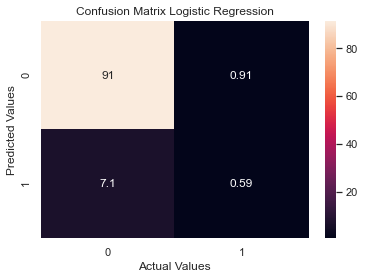

In [68]:
conf_matrix_percentage_LogReg = (conf_matrix_LogReg/X_test.shape[0])*100
sns.heatmap(conf_matrix_percentage_LogReg, annot = True)
plt.title("Confusion Matrix Logistic Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [69]:
accuracy = accuracy_score(y_test, y_pred_LogReg)
precision = precision_score(y_test, y_pred_LogReg)
recall = recall_score(y_test, y_pred_LogReg)
fscore = f1_score(y_test, y_pred_LogReg)

print('Accuracy predict: %.2f%%' % (accuracy * 100))
print('Precision: %.2f%%' % (precision * 100))
print('Recall: %.2f%%' % (recall * 100))
print('F1_score: %.2f%%' % (fscore * 100))

Accuracy predict: 92.02%
Precision: 39.40%
Recall: 7.75%
F1_score: 12.96%


## Random Forest

In [70]:
RFC = RandomForestClassifier(max_depth = 3, min_samples_split = 2, min_samples_leaf = 1)
RFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [87]:
y_pred_RFC = RFC.predict(X_test)

In [88]:
y_pred_RFC

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [89]:
conf_matrix_RFC = confusion_matrix(y_test, y_pred_RFC)
conf_matrix_RFC

array([[86112,     0],
       [ 7145,     0]], dtype=int64)

In [90]:
print("Accuracy:","%.2f%%" % (accuracy_score(y_test, y_pred_RFC)*100))

Accuracy: 92.34%


In [124]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     86112
           1       0.00      0.00      0.00      7145

    accuracy                           0.92     93257
   macro avg       0.46      0.50      0.48     93257
weighted avg       0.85      0.92      0.89     93257



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


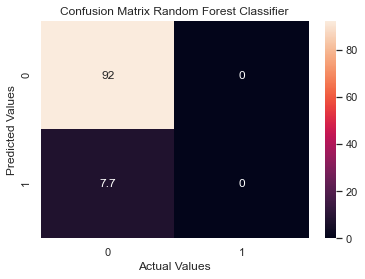

In [93]:
conf_matrix_percentage_RFC = (conf_matrix_RFC/X_test.shape[0])*100
sns.heatmap(conf_matrix_percentage_RFC, annot = True)
plt.title("Confusion Matrix Random Forest Classifier")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [122]:
accuracy = accuracy_score(y_test, y_pred_RFC)
precision = precision_score(y_test, y_pred_RFC,average='weighted')
recall = recall_score(y_test, y_pred_RFC,average='weighted')
fscore = f1_score(y_test, y_pred_RFC,average='weighted')

print('Accuracy predict: %.2f%%' % (accuracy * 100))
print('Precision: %.2f%%' % (precision * 100))
print('Recall: %.2f%%' % (recall * 100))
print('F1_score: %.2f%%' % (fscore * 100))

Accuracy predict: 92.34%
Precision: 85.26%
Recall: 92.34%
F1_score: 88.66%


## K-Nearest Neighbor

In [95]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [96]:
y_pred_KNN = KNN.predict(X_test)

In [97]:
y_pred_KNN

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [98]:
conf_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
conf_matrix_KNN

array([[84313,  1799],
       [ 6498,   647]], dtype=int64)

In [99]:
print("Accuracy:","%.2f%%" % (accuracy_score(y_test, y_pred_KNN)*100))

Accuracy: 91.10%


In [100]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     86112
           1       0.26      0.09      0.13      7145

    accuracy                           0.91     93257
   macro avg       0.60      0.53      0.54     93257
weighted avg       0.88      0.91      0.89     93257



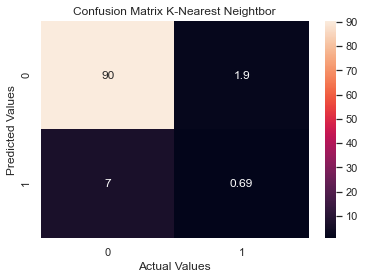

In [101]:
conf_matrix_percentage_KNN = (conf_matrix_KNN/X_test.shape[0])*100
sns.heatmap(conf_matrix_percentage_KNN, annot = True)
plt.title("Confusion Matrix K-Nearest Neightbor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [102]:
accuracy = accuracy_score(y_test, y_pred_KNN)
precision = precision_score(y_test, y_pred_KNN)
recall = recall_score(y_test, y_pred_KNN)
fscore = f1_score(y_test, y_pred_KNN)

print('Accuracy predict: %.2f%%' % (accuracy * 100))
print('Precision: %.2f%%' % (precision * 100))
print('Recall: %.2f%%' % (recall * 100))
print('F1_score: %.2f%%' % (fscore * 100))

Accuracy predict: 91.10%
Precision: 26.45%
Recall: 9.06%
F1_score: 13.49%


## Support Vector Machines

In [103]:
SVM_Clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
SVM_Clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [104]:
y_pred_SVM_Clf = SVM_Clf.predict(X_test)

In [105]:
y_pred_SVM_Clf

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [106]:
conf_matrix_SVM_Clf = confusion_matrix(y_test, y_pred_SVM_Clf)
conf_matrix_SVM_Clf

array([[86112,     0],
       [   97,  7048]], dtype=int64)

In [107]:
print("Accuracy:","%.2f%%" % (accuracy_score(y_test, y_pred_SVM_Clf)*100))

Accuracy: 99.90%


In [108]:
print(classification_report(y_test, y_pred_SVM_Clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86112
           1       1.00      0.99      0.99      7145

    accuracy                           1.00     93257
   macro avg       1.00      0.99      1.00     93257
weighted avg       1.00      1.00      1.00     93257



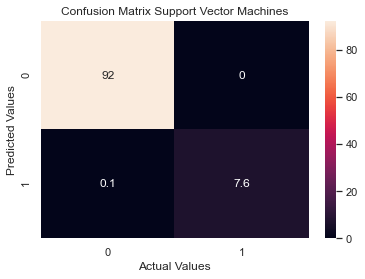

In [109]:
conf_matrix_percentage_SVM_Clf = (conf_matrix_SVM_Clf/X_test.shape[0])*100
sns.heatmap(conf_matrix_percentage_SVM_Clf, annot = True)
plt.title("Confusion Matrix Support Vector Machines")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [110]:
accuracy = accuracy_score(y_test, y_pred_SVM_Clf)
precision = precision_score(y_test, y_pred_SVM_Clf)
recall = recall_score(y_test, y_pred_SVM_Clf)
fscore = f1_score(y_test, y_pred_SVM_Clf)

print('Accuracy predict: %.2f%%' % (accuracy * 100))
print('Precision: %.2f%%' % (precision * 100))
print('Recall: %.2f%%' % (recall * 100))
print('F1_score: %.2f%%' % (fscore * 100))

Accuracy predict: 99.90%
Precision: 100.00%
Recall: 98.64%
F1_score: 99.32%


## Neural Network

In [111]:
NN = MLPClassifier(random_state=1, max_iter=300)
NN.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=1)

In [112]:
y_pred_NN = NN.predict(X_test)

In [113]:
y_pred_NN

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [114]:
conf_matrix_NN = confusion_matrix(y_test, y_pred_NN)
conf_matrix_NN

array([[85841,   271],
       [ 4530,  2615]], dtype=int64)

In [115]:
print("Accuracy:","%.2f%%" % (accuracy_score(y_test, y_pred_NN)*100))

Accuracy: 94.85%


In [116]:
print(classification_report(y_test, y_pred_NN))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     86112
           1       0.91      0.37      0.52      7145

    accuracy                           0.95     93257
   macro avg       0.93      0.68      0.75     93257
weighted avg       0.95      0.95      0.94     93257



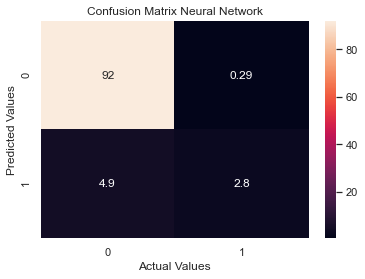

In [117]:
conf_matrix_percentage_NN = (conf_matrix_NN/X_test.shape[0])*100
sns.heatmap(conf_matrix_percentage_NN, annot = True)
plt.title("Confusion Matrix Neural Network")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [118]:
accuracy = accuracy_score(y_test, y_pred_NN)
precision = precision_score(y_test, y_pred_NN)
recall = recall_score(y_test, y_pred_NN)
fscore = f1_score(y_test, y_pred_NN)

print('Accuracy predict: %.2f%%' % (accuracy * 100))
print('Precision: %.2f%%' % (precision * 100))
print('Recall: %.2f%%' % (recall * 100))
print('F1_score: %.2f%%' % (fscore * 100))

Accuracy predict: 94.85%
Precision: 90.61%
Recall: 36.60%
F1_score: 52.14%


# Kesimpulan

1. Analisis Deskriptif:

  a) Terjadi kesamaan anatara jumlah pinjaman yang diajukan oleh peminjam dengan jumlah yang diberikan oleh pihak Lender
  
  b) Tingkat suku bunga cenderung memiliki tren naik. Tetapi tetap berfluktuasi setiap tahunnya. Pada awal 2013 sampai akhir 2014 mengalami penurunan yang mungkin disebabkan oleh kebijakan lender 
  
  c) Peminjam terbanyak melakukan pinjaman dengan tujuan untuk membayar hutang
 
  d) Peminjam bermasalah terbanyak yaitu Charged Off

  g) Peminjam pada grade B memiliki jumlah terbanyak, dan grade G memiliki jumlah paling sedikit


2. Modeling:
  
  Didapatkan model yang terbaik adalah model Support Vector Machine dengan nilai akurasi 99,9% dan presisi 100%